In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# loading in the dataset
df = pd.read_csv("cars.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13058 entries, 0 to 13057
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            12758 non-null  float64
 1   Make                  12758 non-null  object 
 2   Model                 12758 non-null  object 
 3   Vehicle class         12758 non-null  object 
 4   Engine size (L)       12758 non-null  float64
 5   Cylinders             12758 non-null  float64
 6   Transmission          12758 non-null  object 
 7   Fuel type             12758 non-null  object 
 8   City (L/100 km)       12758 non-null  float64
 9   Highway (L/100 km)    12758 non-null  float64
 10  Combined (L/100 km)   12758 non-null  float64
 11  Combined (mpg)        12758 non-null  float64
 12  CO2 emissions (g/km)  12758 non-null  float64
 13  CO2 rating            11313 non-null  float64
 14  Smog rating           9925 non-null   float64
dtypes: float64(10), obj

Dataset Information

Number of Entries: 13085
Number of Features: 15

# **Data Preprocessing**

In [4]:
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2015.0,Acura,ILX,Compact,2.0,4.0,AS5,Z,9.7,6.7,8.3,34.0,191.0,NaN,NaN
1,2015.0,Acura,ILX,Compact,2.4,4.0,M6,Z,10.8,7.4,9.3,30.0,214.0,NaN,NaN
2,2015.0,Acura,ILX Hybrid,Compact,1.5,4.0,AV7,Z,6.0,6.1,6.1,46.0,140.0,NaN,NaN
3,2015.0,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0,NaN,NaN
4,2015.0,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0,NaN,NaN


In [5]:
# filtering out cars with any missing values
df.dropna(inplace=True)

In [6]:
# Handling duplicated rows
print("Number of Duplicated Rows: ", df.duplicated().sum())

df.drop_duplicates(inplace=True)

Number of Duplicated Rows:  1317


In [7]:
# converting appropriate fields to integer fields
integer_fields = ["Model year", "Cylinders", "CO2 emissions (g/km)", "Smog rating"]
for field in integer_fields:
    df[field] = df[field].astype(int)

In [8]:
# converting the oddly-labeled fuel type abbreviations to their brand name for clarity
fuel_type_mapping = {
    "D": "Diesel",
    "Z": "Premium",
    "E": "Flex-Fuel",
    "X": "Regular"
}

df["Fuel type"] = df["Fuel type"].map(fuel_type_mapping)

Removing entries with non-sensical attributes

In [9]:
# max model year cant be more than 2025 (current year)
df = df[df["Model year"] <= 2025]

# max engine size can't be more than 28.4L
df = df[df["Engine size (L)"] <= 28.4]

# max cylinders can't be more than 16
df = df[df["Cylinders"] <= 16]

# the best performing car is only getting 57mpg right now
df = df[df["Combined (mpg)"] <= 57]

df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000
mean,2020.308079,3.155676,5.645535,12.529803,9.249968,11.053344,27.114805,256.654039,4.495039,4.798093
std,2.259698,1.339913,1.901433,3.327348,2.147856,2.749851,6.758468,59.991636,1.506432,1.779342
min,2017.000000,0.900000,3.000000,4.800000,4.500000,5.000000,11.000000,114.000000,1.000000,1.000000
25%,2018.000000,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.000000,3.000000,3.000000
50%,2020.000000,3.000000,6.000000,12.200000,9.000000,10.700000,26.000000,253.000000,4.000000,5.000000
75%,2022.000000,3.700000,6.000000,14.500000,10.500000,12.700000,31.000000,295.000000,5.000000,6.000000
max,2024.000000,8.400000,16.000000,30.700000,20.900000,26.100000,56.000000,608.000000,10.000000,8.000000


# **Data Exploration**

In [10]:
# Number of Rows and Columns after cleaning
row, col = df.shape
print("Number of Entries:", row)
print("Number of Features:", col)

Number of Entries: 7761
Number of Features: 15


In [11]:
# NUMBER OF UNIQUE VALUES PER COLUMN
print("NUMBER OF UNIQUE VALUES PER COLUMN")
print(df.nunique())

NUMBER OF UNIQUE VALUES PER COLUMN
Model year                 8
Make                      41
Model                   1745
Vehicle class             15
Engine size (L)           47
Cylinders                  8
Transmission              26
Fuel type                  4
City (L/100 km)          197
Highway (L/100 km)       129
Combined (L/100 km)      163
Combined (mpg)            45
CO2 emissions (g/km)     311
CO2 rating                10
Smog rating                7
dtype: int64


array([[<Axes: title={'center': 'Model year'}>,
        <Axes: title={'center': 'Engine size (L)'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'City (L/100 km)'}>,
        <Axes: title={'center': 'Highway (L/100 km)'}>,
        <Axes: title={'center': 'Combined (L/100 km)'}>],
       [<Axes: title={'center': 'Combined (mpg)'}>,
        <Axes: title={'center': 'CO2 emissions (g/km)'}>,
        <Axes: title={'center': 'CO2 rating'}>],
       [<Axes: title={'center': 'Smog rating'}>, <Axes: >, <Axes: >]],
      dtype=object)

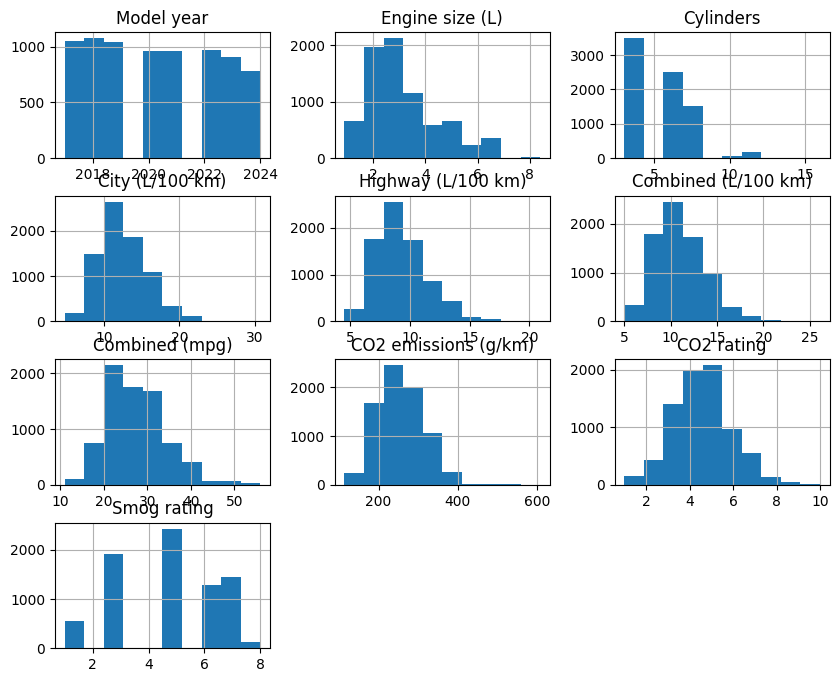

In [12]:
# Histogram for all numeric columns
df.hist(figsize=(10,8))

In [13]:
# Proportion of values in Vehicle Class
df['Vehicle class'].value_counts(normalize=True) * 100

Vehicle class
Sport utility vehicle: Small       19.417601
Sport utility vehicle: Standard    13.232831
Mid-size                           12.859168
Pickup truck: Standard              9.895632
Compact                             9.792553
Subcompact                          8.787527
Full-size                           7.524804
Two-seater                          6.274965
Minicompact                         4.496843
Station wagon: Small                2.525448
Pickup truck: Small                 2.216209
Special purpose vehicle             0.992140
Minivan                             0.876176
Station wagon: Mid-size             0.863291
Van: Passenger                      0.244814
Name: proportion, dtype: float64

In [14]:
# Count of values in Model
df['Model'].value_counts().head(25)

Model
Sierra 4WD             38
Silverado 4WD          38
Mustang                36
Silverado              30
Sierra                 30
Camaro                 30
F-150 FFV              28
Civic Sedan            26
Civic Hatchback        26
Mustang Convertible    25
Elantra                24
F-150 4X4              23
Edge AWD               23
Canyon                 23
Colorado               23
F-150                  22
Corolla                21
Challenger             21
Tacoma 4WD             20
Canyon 4WD             20
Sierra FFV             20
Silverado FFV          20
Sierra 4WD FFV         20
Explorer AWD           20
Colorado 4WD           20
Name: count, dtype: int64

In [15]:
# Proportion of values in Fuel Type
df['Fuel type'].value_counts(normalize=True) * 100

Fuel type
Premium      48.666409
Regular      46.282696
Flex-Fuel     2.667182
Diesel        2.383713
Name: proportion, dtype: float64

In [16]:
# Proportion of values in Smog Category
df['Smog rating'].value_counts(normalize=True) * 100

Smog rating
5    31.297513
3    24.674655
7    18.670274
6    16.466950
1     7.254220
8     1.546193
2     0.090195
Name: proportion, dtype: float64

In [17]:
# Average Smog rating per Fuel Type
df.groupby('Fuel type')['Smog rating'].mean()

Fuel type
Diesel       2.681081
Flex-Fuel    4.183575
Premium      4.339158
Regular      5.425111
Name: Smog rating, dtype: float64

In [18]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000
mean,2020.308079,3.155676,5.645535,12.529803,9.249968,11.053344,27.114805,256.654039,4.495039,4.798093
std,2.259698,1.339913,1.901433,3.327348,2.147856,2.749851,6.758468,59.991636,1.506432,1.779342
min,2017.000000,0.900000,3.000000,4.800000,4.500000,5.000000,11.000000,114.000000,1.000000,1.000000
25%,2018.000000,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.000000,3.000000,3.000000
50%,2020.000000,3.000000,6.000000,12.200000,9.000000,10.700000,26.000000,253.000000,4.000000,5.000000
75%,2022.000000,3.700000,6.000000,14.500000,10.500000,12.700000,31.000000,295.000000,5.000000,6.000000
max,2024.000000,8.400000,16.000000,30.700000,20.900000,26.100000,56.000000,608.000000,10.000000,8.000000


# **Hypothesis Testing**

**Engine Size related to CO₂ Emissions?**

Largers engines generally burn more fuel than smaller engines. However, vehicles using larger engines are on the highway more often than not so their fuel efficiency might be better (relative to the engine size) than smaller engine vehicles that spend a lot of time starting and stopping in local streets. It makes sense to test this relationship.

**Regression**<br>
H0: Engine Size and CO₂ Emissions are not related<br>
HA: Engine Size and CO₂ Emissions are related

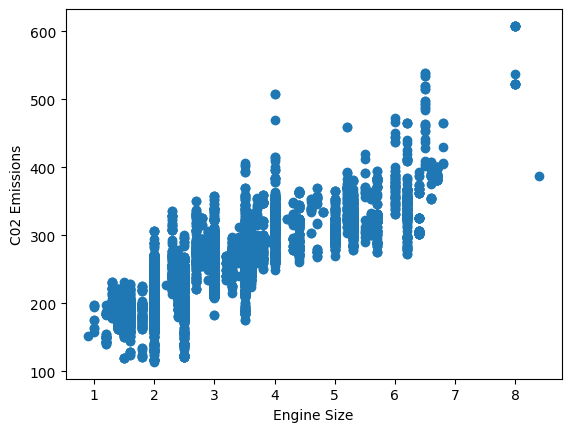

In [19]:
# visualizing hypothesis
plt.scatter(df["Engine size (L)"], df["CO2 emissions (g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("C02 Emissions")
plt.show()

In [26]:
# computing p-value from regression analysis
result = linregress(df["Engine size (L)"], df["CO2 emissions (g/km)"])
print("p-value:", result.pvalue)
print("slope:", result.slope)

p-value: 0.0
slope: 37.025089468384245


Engine Size & CO₂

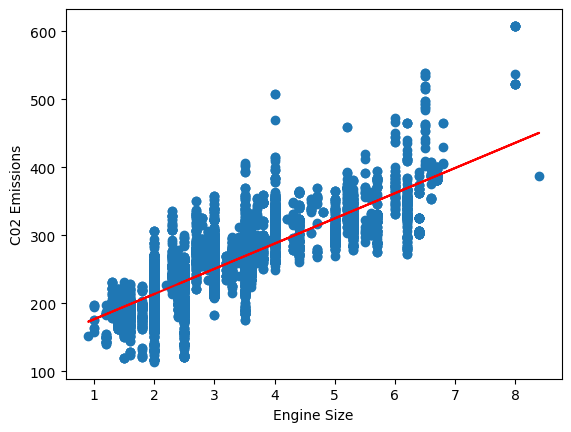

In [21]:
plt.scatter(df["Engine size (L)"], df["CO2 emissions (g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("C02 Emissions")
plt.plot(df["Engine size (L)"], result.intercept + result.slope*df["Engine size (L)"], 'r', label='fitted line')
plt.show()

The p-value is 0.0 which means there is a 100% chance Engine Size & CO₂ emmissions are related.
For every increase in Engine Size by 1, the CO₂ emmissions increase by about 37

**Fuel Type related to CO₂ Emissions?**

Different fuel types generally produce varying levels of CO₂ when burned or used to power vehicles. Gasoline engines typically emit more CO₂ than diesel per unit of fuel, while electric vehicles may produce little to none. Since fuel composition and combustion efficiency differ across types, it makes sense to test whether fuel type significantly affects CO₂ emissions.

**One-Way ANOVA**<br>
H0: Fuel type does not affect CO2 emissions<br>
HA: Fuel type significantly affects CO2 emissions

In [22]:
# Get the list of fuel types and corresponding emissions
fuel_groups = [group['CO2 emissions (g/km)'].values
               for name, group in df.groupby('Fuel type')]

# Run ANOVA
f_stat, p_value = f_oneway(*fuel_groups)
print("ANOVA Test Results:")
print(f"F-statistic = {f_stat:.3f}")
print(f"P-value = {p_value:.5f}")

ANOVA Test Results:
F-statistic = 230.819
P-value = 0.00000


Fuel Type and CO₂ emmissions are definitely related because the p value is 0.0
The F-statistic of 230 means the variation between the fuel types affecting CO₂ emmissions is great. 
At least 1 fuel type affects CO₂ emmissions much more/less extreme than the others.

Fuel Type and CO₂

/var/folders/4j/bzjzr7sx5cv9skphgq447myw0000gn/T/ipykernel_85845/2492406405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)', palette='Set3')


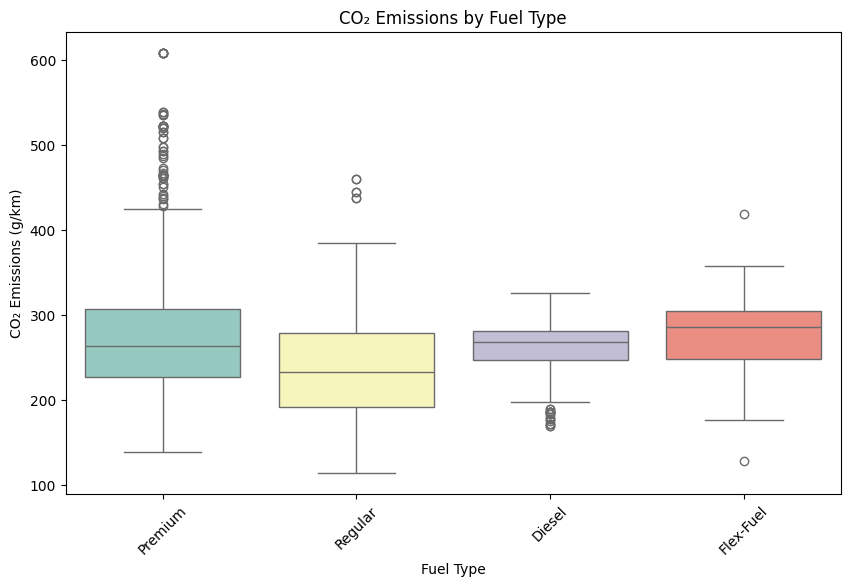

In [23]:
# Visualization
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)', palette='Set3')
plt.title('CO₂ Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

**Follow-Up Tukey Test**

**Fuel Type related to Smog Rating Category?**

Smog ratings indicate how much a vehicle contributes to air pollution based on emissions of harmful gases. Different fuel types produce varying levels of pollutants, which can influence these ratings. Because fuel combustion and emission control technologies differ by fuel type, it makes sense to test whether there is an association between fuel type and smog rating category.

**Chi-Square Test of Independence**<br>
H0: There is no association between fuel type and smog rating category.<br>
HA: There is an association between fuel type and smog rating category.<br><br>

*Note -> Regarding smog ratings, vehicles that score a 10 are the **cleanest**. The categories are defined as such:<br>

*   Low: 1–3
*   Medium: 4–7
*   High: 8–10





In [24]:
# Creating smog rating categories
def categorize_smog(rating):
    if rating <= 3:
        return "Low"
    elif rating <= 7:
        return "Medium"
    else:
        return "High"

df["Smog Category"] = df["Smog rating"].apply(categorize_smog)

# Build the contingency table
contingency = pd.crosstab(df["Fuel type"], df["Smog Category"])

# Run the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-square test results:")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")


Chi-square test results:
Chi2 Statistic: 809.302
P-value: 0.0000


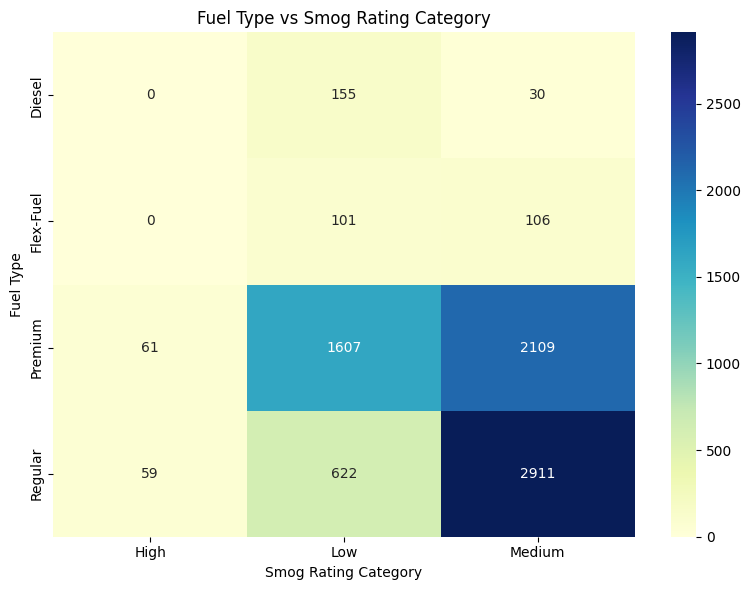

In [25]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Fuel Type vs Smog Rating Category")
plt.xlabel("Smog Rating Category")
plt.ylabel("Fuel Type")
plt.tight_layout()
plt.show()

explain the test results